In [6]:
using LaTeXStrings
# using IntervalSets
using Plots

include("./libs/display-latex.jl")
include("./libs/crisp-pcm.jl")
include("./libs/solve-deterministic-ahp.jl")
include("./libs/X.jl")
include("./libs/MMR-W2.jl")

MMR_W (generic function with 1 method)

In [7]:
# 完全整合
# A = [
#     1 1 1 1
#     1 1 1 1
#     1 1 1 1
#     1 1 1 1.0
# ]
# A = [
#     1   3   5   7
#     1/3 1   5/3 7/3
#     1/5 3/5 1   7/5
#     1/7 3/7 5/7 1
# ]
# A = [
#     1 1 1/3
#     1 1 1/3
#     3 3 1
# ]

# CI = 0.01
# A = [
#     1 2 4/3 4/3
#     1/2 1 1 1
#     3/4 1 1 3/2
#     3/4 1 2/3 1.0
# ]
# A = [
#     1 1 2/3 1
#     1 1 4/9 2/3
#     3/2 9/4 1 1
#     1 3/2 1 1.0
# ]

# CI = 0.15
# A = [
#     1 1 2 2
#     1 1 3 1
#     1/2 1/3 1 3
#     1/2 1 1/3 1
# ]

# エラーケース EVでダメなやつ
# A = [
#     1.0  1.0  2.0  3.0  3.0
#     1.0  1.0  2.0  3.0  5.0
#     1/2  1/2  1.0  1.0  3.0
#     1/3  1/3  1.0  1.0  2.0
#     1/3  1/5  1/3  1/2  1.0
# ]

# エラーケース GMでダメなやつ
# A = [
#     1.0  1.0  2.0  3.0  8.0
#     1.0  1.0  2.0  2.0  3.0
#     1/2  1/2  1.0  2.0  6.0
#     1/3  1/2  1/2  1.0  5.0
#     1/8  1/3  1/6  1/5  1.0
# ]

# エラーケース ADでダメなやつ
# A = [
#     1.0  2.0   2.0   3.0   2.0
#     1/2  1.0   1.0   2.0   4.0
#     1/2  1.0   1.0   1.0   4.0
#     1/3  1/2   1.0   1.0   4.0
#     1/2  1/4  1/4  1/4  1.0
# ]

# エラーケース ADでダメなやつ
# 分数表記はOK
# A = [
#     1.0 1.0 2.0 3.0 6.0
#     1.0 1.0 2.0 2.0 6.0
#     1/2 1/2 1.0 1.0 5.0
#     1/3 1/2 1.0 1.0 1.0
#     1/6 1/6 1/5 1.0 1.0
# ]

# 実数表記はNG
# A = [
#     1.000000 1.000000 2.000000 3.000000 6.000000
#     1.000000 1.000000 2.000000 2.000000 6.000000
#     0.500000 0.500000 1.000000 1.000000 5.000000
#     0.333333 0.500000 1.000000 1.000000 1.000000
#     0.166667 0.166667 0.200000 1.000000 1.000000
# ]

# A = [
#     1.000000 1.000000 1.000000 1.000000 3.000000 3.000000
#     1.000000 1.000000 1.000000 1.000000 3.000000 4.000000
#     1.000000 1.000000 1.000000 2.000000 1.000000 4.000000
#     1.000000 1.000000 0.500000 1.000000 2.000000 2.000000
#     0.333333 0.333333 1.000000 0.500000 1.000000 1.000000
#     0.333333 0.250000 0.250000 0.500000 1.000000 1.000000
# ]

# A = [
#     1 3 5
#     1/3 1 2 
#     1/5 1/2 1
# ]

# このときだけ推定結果が異なる
A = [
    1 2 1 2
    1/2 1 2 1 
    1 1/2 1 2
    1/2 1 1/2 1
]


display(L"A = %$(matrixLaTeXString(A))")

L"$A = \begin{pmatrix} 1.0 & 2.0 & 1.0 & 2.0 \\0.5 & 1.0 & 2.0 & 1.0 \\1.0 & 0.5 & 1.0 & 2.0 \\0.5 & 1.0 & 0.5 & 1.0 \\ \end{pmatrix}$"

In [8]:
solution1 = X(A, EV)
s1 = solution1.s
centers1 = solution1.centers
l1 = solution1.l
W1 = solution1.W
display(L"X_E = %$(intervalVectorLaTeXString(W1))")


L"$X_E = \begin{pmatrix} \left[ 0.197, 0.45 \right] \\ \left[ 0.127, 0.317 \right] \\ \left[ 0.084, 0.349 \right] \\ \left[ 0.098, 0.379 \right] \end{pmatrix}$"

In [9]:
solution2 = MMR_W(A, EV)
W2 = solution2.W
centers2 = solution2.centers
l2 = solution2.l
display(L"E-MMR_W = %$(intervalVectorLaTeXString(W2))")

L"$E-MMR_W = \begin{pmatrix} \left[ 0.323, 0.346 \right] \\ \left[ 0.164, 0.343 \right] \\ \left[ 0.155, 0.334 \right] \\ \left[ 0.161, 0.173 \right] \end{pmatrix}$"

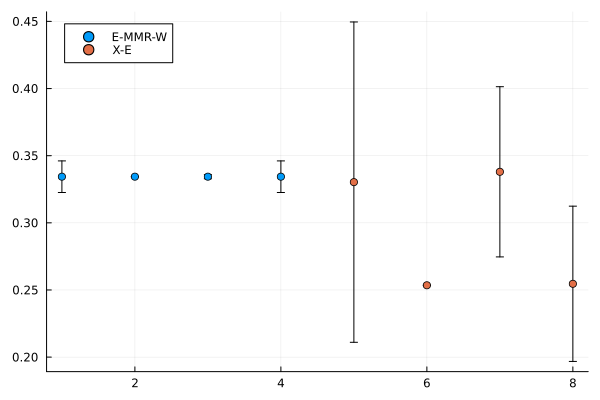

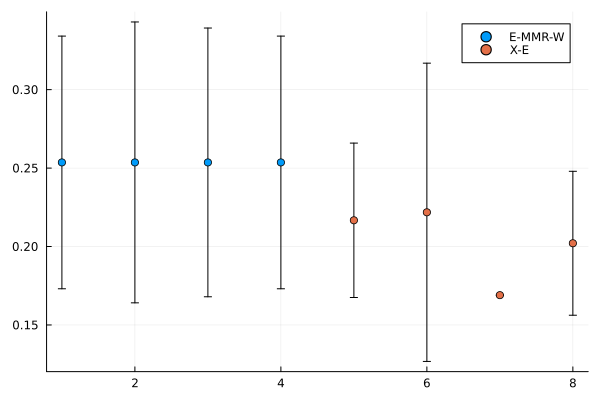

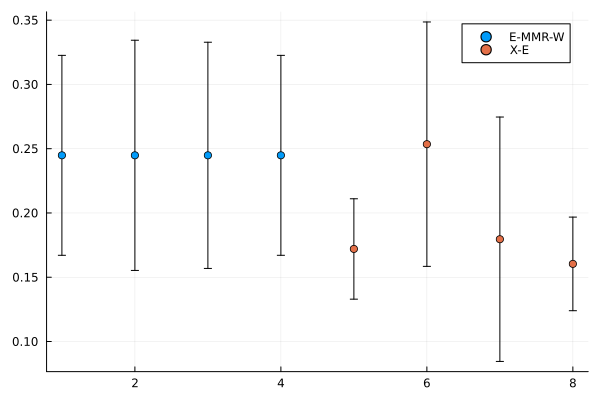

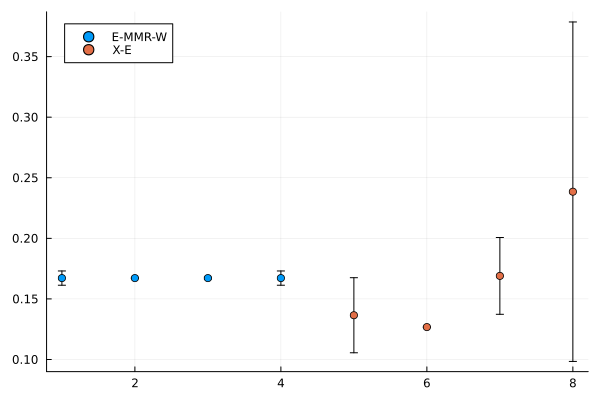

In [10]:

m, n = size(A)
# plot_obj = plot()

for i in 1:n
    plot_obj = plot()
    x = 1:n
    y = fill(centers2[i],n)
    e = l2[i, :]
    plot!(x, y, grid=true, yerror=e, st=:scatter, label = "E-MMR-W")
    x = n+1:n*2
    y = centers1[i, :]/s1
    e = l1[i, :]/s1
    plot!(x, y, grid=true, yerror=e, st=:scatter, label = "X-E")
    display(plot_obj)
end
